<a href="https://colab.research.google.com/github/AlinFin/Classification/blob/main/SM_GLS_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
gls=pd.read_csv('2023_GLS_Significant.csv')
gls

,gls,sample,relative abundance
0,Butyl glucosinolate,Cyp,4.356963e+03
1,Butyl glucosinolate,Cyp,3.648961e+03
2,Butyl glucosinolate,Cyp,4.236367e+03
3,Butyl glucosinolate,Cyp,4.071332e+03
4,Butyl glucosinolate,ICT1,4.571308e+03
5,Butyl glucosinolate,ICT1,4.417179e+03
6,Butyl glucosinolate,ICT1,3.912476e+03
7,Butyl glucosinolate,ICT1,3.551178e+03
8,Butyl glucosinolate,WT,5.295103e+03
9,Butyl glucosinolate,WT,5.444640e+03


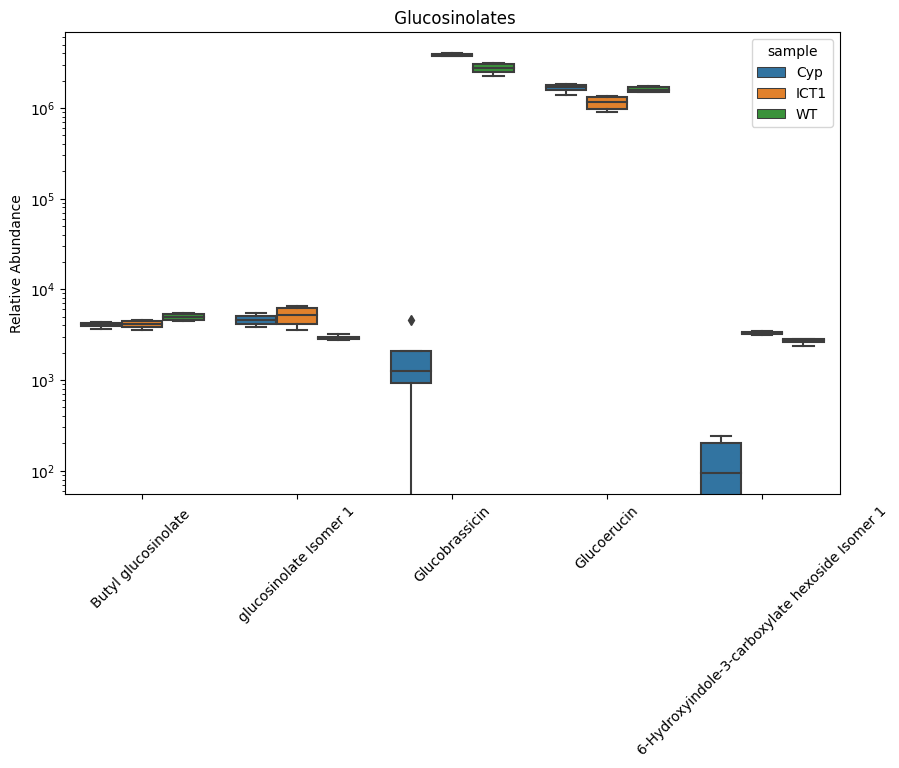

In [15]:
# Create a box plot using Seaborn directly on the grouped data
plt.figure(figsize=(10, 6))
sns.boxplot(data=gls, x='gls', y='relative abundance', hue='sample')
plt.xlabel('')
plt.ylabel('Relative Abundance')
plt.title(' Glucosinolates')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Remove grid lines
plt.grid(False)

plt.show()


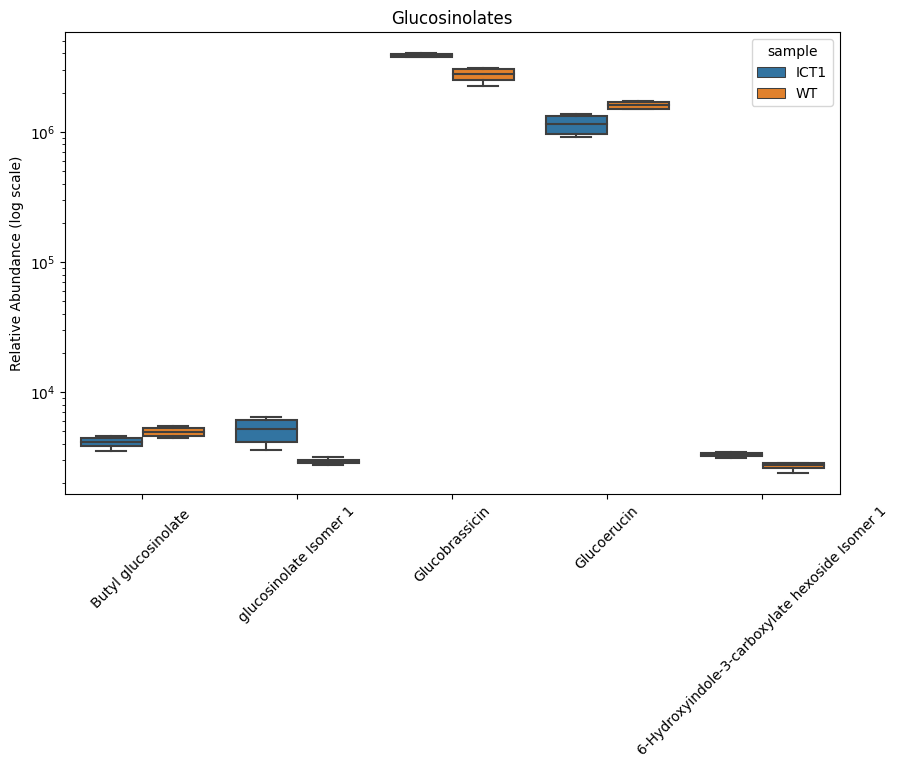

In [13]:
# Filter the data to exclude samples with 'Cyp'
filtered_gls = gls[gls['sample'] != 'Cyp']

# Create a box plot using Seaborn with the filtered data and logarithmic y-axis scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_gls, x='gls', y='relative abundance', hue='sample')
plt.xlabel('')
plt.ylabel('Relative Abundance (log scale)')
plt.title('Glucosinolates')
plt.yscale('log')  # Set the y-axis scale to logarithmic

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the background color to white
plt.gca().set_facecolor('white')

# Remove grid lines
plt.grid(False)

plt.show()

In [25]:
gls_all=pd.read_csv('2023_GLS.csv')
print(gls_all.shape)
gls_all.head()


(372, 3)


,gls,sample,relative abundance
0,Butyl glucosinolate - isomer 1,Cyp,4356.962728
1,Butyl glucosinolate - isomer 1,Cyp,3648.960859
2,Butyl glucosinolate - isomer 1,Cyp,4236.367340
3,Butyl glucosinolate - isomer 1,Cyp,4071.331755
4,Butyl glucosinolate - isomer 1,ICT1,4571.307993


In [40]:
sorted=gls_all.sort_values(by='relative abundance',ascending=False)
sorted

,gls,sample,relative abundance
162,Glucobrassicin,ICT1,4016521.660
163,Glucobrassicin,ICT1,3966261.920
161,Glucobrassicin,ICT1,3777820.681
160,Glucobrassicin,ICT1,3763365.128
165,Glucobrassicin,WT,3091361.084
...,...,...,...
153,5-Methylsulfonylpentyl glucosinolate,WT,0.000
147,5-Methylsulfonylpentyl glucosinolate,Cyp,0.000
145,5-Methylsulfonylpentyl glucosinolate,Cyp,0.000
337,6-Hydroxyindole-3-oyl sinapoyl dihexoside,Cyp,0.000


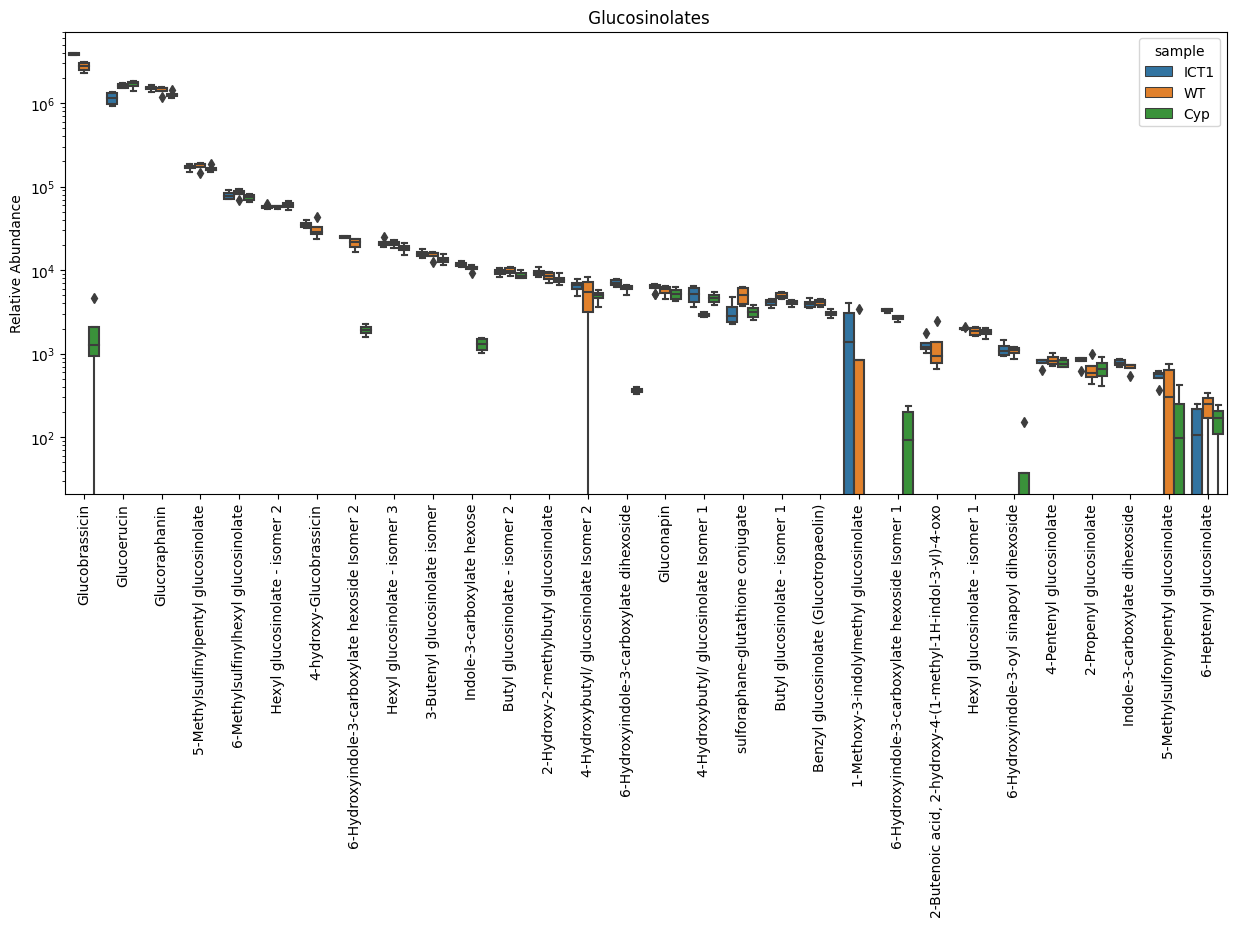

In [41]:
# Create a box plot using Seaborn directly on the grouped data
plt.figure(figsize=(15, 6))
sns.boxplot(data=sorted, x='gls', y='relative abundance', hue='sample')
plt.xlabel('')
plt.ylabel('Relative Abundance')
plt.title(' Glucosinolates')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Remove grid lines
plt.grid(False)

plt.show()

Index(['Glucobrassicin', 'Glucoerucin', 'Glucoraphanin',
       '5-Methylsulfinylpentyl glucosinolate',
       '6-Methylsulfinylhexyl glucosinolate',
       ' Hexyl glucosinolate - isomer 2', '4-hydroxy-Glucobrassicin',
       'Hexyl glucosinolate - isomer 3',
       '6-Hydroxyindole-3-carboxylate hexoside Isomer 2',
       '3-Butenyl glucosinolate isomer', '  Butyl glucosinolate - isomer 2',
       '2-Hydroxy-2-methylbutyl glucosinolate', 'Indole-3-carboxylate hexose',
       'Gluconapin', '4-Hydroxybutyl/ glucosinolate Isomer 2',
       '6-Hydroxyindole-3-carboxylate dihexoside',
       ' Butyl glucosinolate - isomer 1',
       '4-Hydroxybutyl/ glucosinolate Isomer 1',
       'sulforaphane-glutathione conjugate',
       'Benzyl glucosinolate (Glucotropaeolin)',
       '6-Hydroxyindole-3-carboxylate hexoside Isomer 1',
       ' Hexyl glucosinolate - isomer 1',
       '1-Methoxy-3-indolylmethyl glucosinolate',
       '2-Butenoic acid, 2-hydroxy-4-(1-methyl-1H-indol-3-yl)-4-oxo',
      

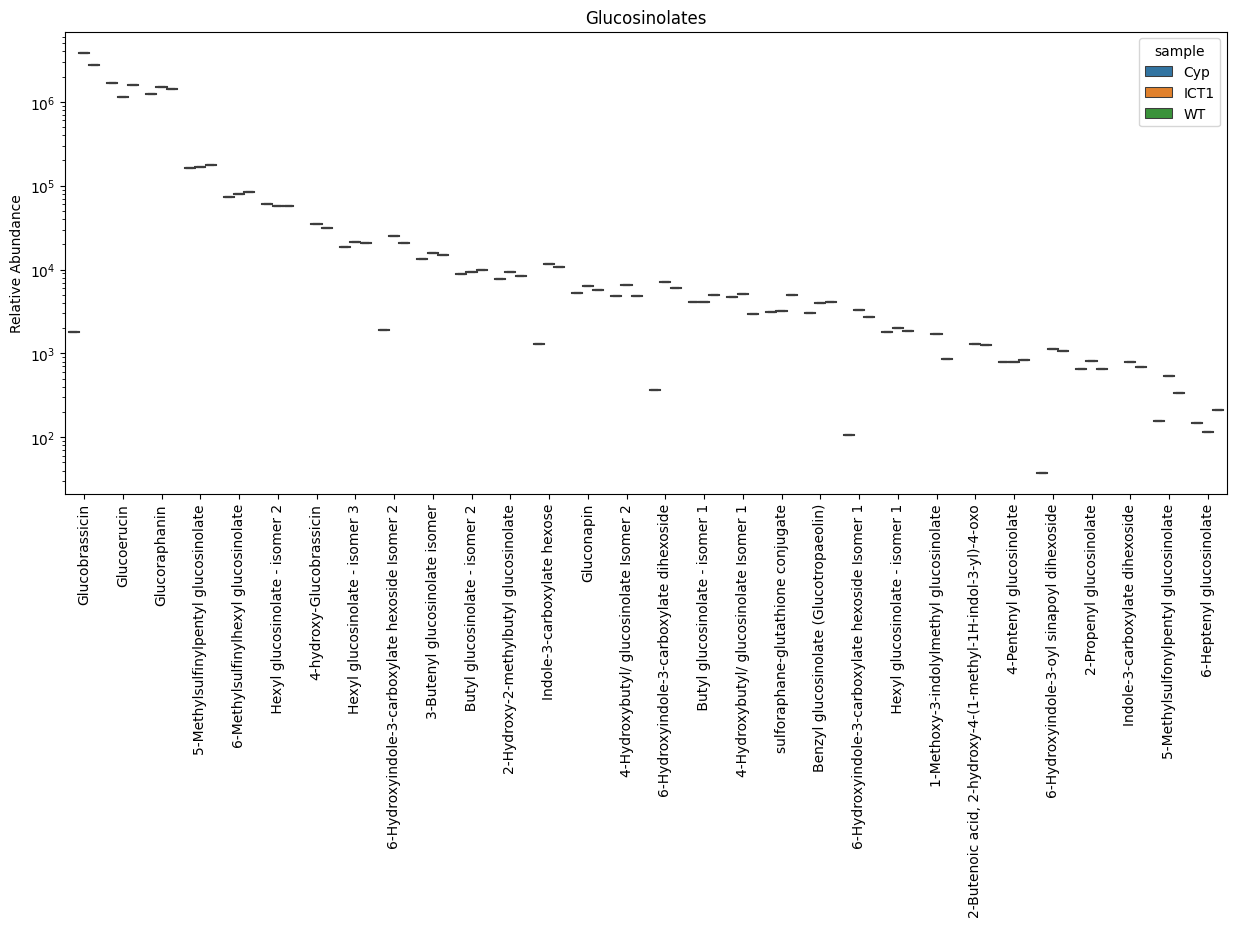

In [38]:

# Calculate the mean relative abundance for each 'gls' and 'sample' combination
average_data = gls_all.groupby(['gls', 'sample'])['relative abundance'].mean().reset_index()

# Sort the 'gls' categories based on mean relative abundance in descending order
sorted_gls = average_data.groupby('gls')['relative abundance'].mean().sort_values(ascending=False).index
print(sorted_gls)
# # Create a new DataFrame with the sorted 'gls' categories
# sorted_average_data = average_data.copy()
# sorted_average_data['gls'] = pd.Categorical(sorted_average_data['gls'], categories=sorted_gls, ordered=True)
# sorted_average_data

# Create a box plot using Seaborn with the sorted 'gls' categories and logarithmic y-axis scale
plt.figure(figsize=(15, 6))
sns.boxplot(data=sorted_average_data, x='gls', y='relative abundance', hue='sample', order=sorted_gls)
plt.xlabel('')
plt.ylabel('Relative Abundance')
plt.title('Glucosinolates')
plt.yscale('log')  # Set the y-axis scale to logarithmic

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Remove grid lines
plt.grid(False)

plt.show()











# PCA

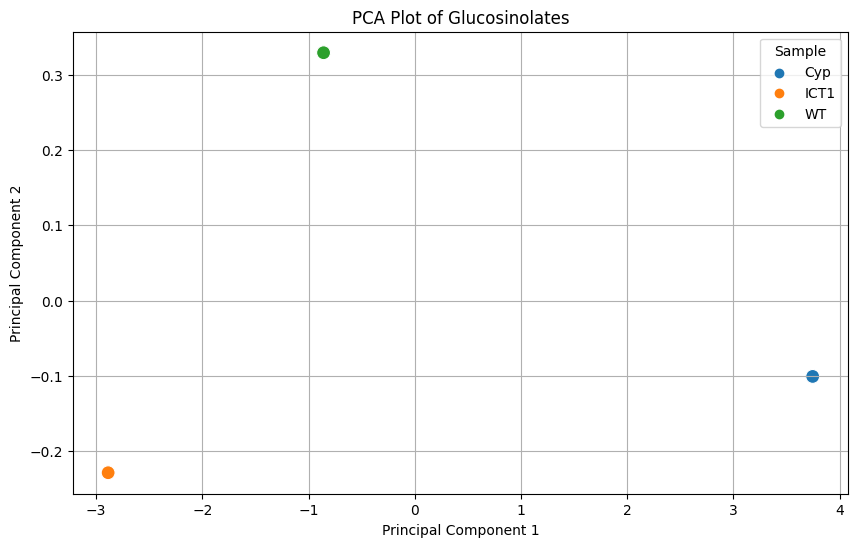

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Perform data normalization using StandardScaler
scaler = StandardScaler()
gls_all['scaled_relative_abundance'] = scaler.fit_transform(gls_all['relative abundance'].values.reshape(-1, 1))

# Create a pivot table with mean aggregation (in case of duplicate entries)
pivot_data = gls_all.pivot_table(index='sample', columns='gls', values='scaled_relative_abundance', aggfunc='mean').reset_index()

# Extract the 'sample' column (labels) for later use in the plot
samples = pivot_data['sample']
pivot_data.drop(columns='sample', inplace=True)

# Perform PCA with n_components=2 (you can choose the number of components you want)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_data)

# Create a new DataFrame with the PCA results and the sample labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['sample'] = samples

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sample', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Glucosinolates')
plt.legend(title='Sample')
plt.grid(True)
plt.show()

In [130]:
df=pd.read_csv('2023_gls_all.csv', index_col='name')
df

,1- // 2- Methylpropyl glucosinolate // Butyl glucosinolate - isomer 1,1- // 2- Methylpropyl glucosinolate // Butyl glucosinolate - isomer 2,1-Methoxy-3-indolylmethyl glucosinolate,2-Hydroxy-2-methylbutyl glucosinolate,2-Hydroxy-2-methylpropyl/4-Hydroxybutyl/ glucosinolate Isomer 1,2-Hydroxy-2-methylpropyl/4-Hydroxybutyl/ glucosinolate Isomer 2,2-Propenyl glucosinolate,3-//4- Methylpentyl glucosinolate // Hexyl glucosinolate - isomer 1,3-//4- Methylpentyl glucosinolate // Hexyl glucosinolate - isomer 2,3-//4- Methylpentyl glucosinolate // Hexyl glucosinolate - isomer 3,...,Benzyl glucosinolate (Glucotropaeolin),Gluconapin,sulforaphane-glutathione conjugate,"2-Butenoic acid, 2-hydroxy-4-(1-methyl-1H-indol-3-yl)-4-oxo",6-Hydroxyindole-3-carboxylate dihexoside,6-Hydroxyindole-3-carboxylate hexoside Isomer 1,6-Hydroxyindole-3-carboxylate hexoside Isomer 2,6-Hydroxyindole-3-oyl sinapoyl dihexoside,Indole-3-carboxylate dihexoside,Indole-3-carboxylate hexose
name,,,,,,,,,,,,,,,,,,,,,
Cyp-1,4356.962728,10143.604120,0.000000,9213.681817,5520.172894,5749.928967,912.591691,2036.488242,66692.76176,21035.61030,...,3401.671971,6327.163194,3483.278446,0.000000,367.651338,0.000000,1797.743843,151.662357,0.000000,1482.199240
Cyp-2,3648.960859,8141.684010,0.000000,6735.156843,4283.983573,3641.352866,415.288496,1503.035901,52094.32514,15300.22645,...,2713.319134,5635.065764,3793.109890,0.000000,350.115128,238.926232,2016.267251,0.000000,0.000000,1152.735049
Cyp-3,4236.367340,9095.845751,0.000000,7391.671551,3867.412261,4942.744413,725.541753,1798.898372,62643.46486,18895.02599,...,3009.842933,4627.152372,2812.288052,0.000000,401.044674,187.957721,1595.191531,0.000000,0.000000,1028.196441
Cyp-4,4071.331755,8134.842230,0.000000,7762.667570,4903.652294,5115.815867,575.152554,1852.217493,57801.49556,18258.02238,...,3129.146463,4305.450706,2541.506231,0.000000,329.787859,0.000000,2258.882921,0.000000,0.000000,1557.596297
ICT1-1,4571.307993,10569.810600,2746.930794,10844.423610,6478.649257,6830.313347,872.435226,2117.680221,61877.37800,25008.32882,...,4635.909118,6470.583870,3235.588397,1212.903240,7772.788773,3379.599817,24116.803640,1443.242277,688.292604,12729.060020
ICT1-2,4417.179205,9753.432189,4023.969133,9566.454565,4352.501660,4930.739480,891.801014,1943.463801,56766.12996,20528.66419,...,4077.113914,6905.497092,2260.822993,1164.826836,7477.171283,3253.155013,25806.029350,1159.072327,868.111343,11326.165620
ICT1-3,3912.476241,9234.814483,0.000000,8731.930485,3581.836667,7874.854488,628.939586,1979.083371,56260.00095,19085.99419,...,3504.324153,6603.118729,4766.813011,1753.551047,6718.038964,3468.377525,25210.924410,937.874108,742.993704,10941.926270
ICT1-4,3551.178210,8173.272183,0.000000,8368.420753,6049.518091,6399.964397,876.369725,1983.165266,54042.96488,20402.62777,...,3705.090408,5230.624427,2434.361156,1011.650198,6264.047190,3099.697123,24586.457890,980.585473,823.199511,11911.714950
WT-1,5295.103498,10396.265050,0.000000,8071.401947,2741.797625,0.000000,986.482458,2027.774545,59111.84282,21330.07189,...,4305.890088,6272.309769,6024.050985,2451.310983,6556.179602,2859.007997,23828.442920,1145.798213,729.599263,11616.086730


In [131]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [132]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_result

array([[ 1.58146286,  4.70021119],
       [ 5.50871452,  0.25928457],
       [ 5.27416481,  1.01027344],
       [ 6.19061887, -0.11625099],
       [-5.10583578,  0.8562376 ],
       [-3.1983181 , -2.04972435],
       [-3.00717302, -1.2073727 ],
       [-0.05982553, -3.73072787],
       [-4.26278592,  1.44025344],
       [-3.54315644,  1.92253797],
       [-0.93890418,  0.69655101],
       [ 1.5610379 , -3.78127333]])

In [133]:
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['sample'] = df.index

pca_df

,PC1,PC2,sample
0,1.581463,4.700211,Cyp-1
1,5.508715,0.259285,Cyp-2
2,5.274165,1.010273,Cyp-3
3,6.190619,-0.116251,Cyp-4
4,-5.105836,0.856238,ICT1-1
5,-3.198318,-2.049724,ICT1-2
6,-3.007173,-1.207373,ICT1-3
7,-0.059826,-3.730728,ICT1-4
8,-4.262786,1.440253,WT-1
9,-3.543156,1.922538,WT-2


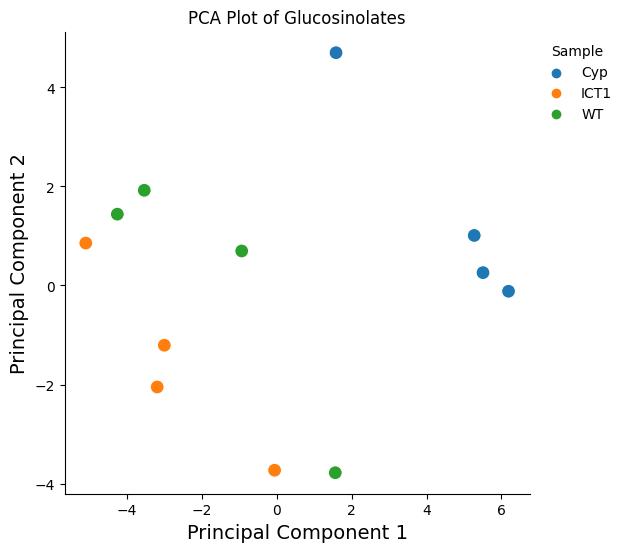

In [134]:


# Modify the sample names to group all Cyp samples
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'Cyp' if x.startswith('Cyp') else x)
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'ICT1' if x.startswith('ICT1') else x)
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'WT' if x.startswith('WT') else x)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sample', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA Plot of Glucosinolates')
plt.legend(title='Sample')
plt.grid(True)

# Create a legend with custom label names and move it to the right side
plt.legend(title='Sample', bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.grid(False)
sns.despine()
plt.show()

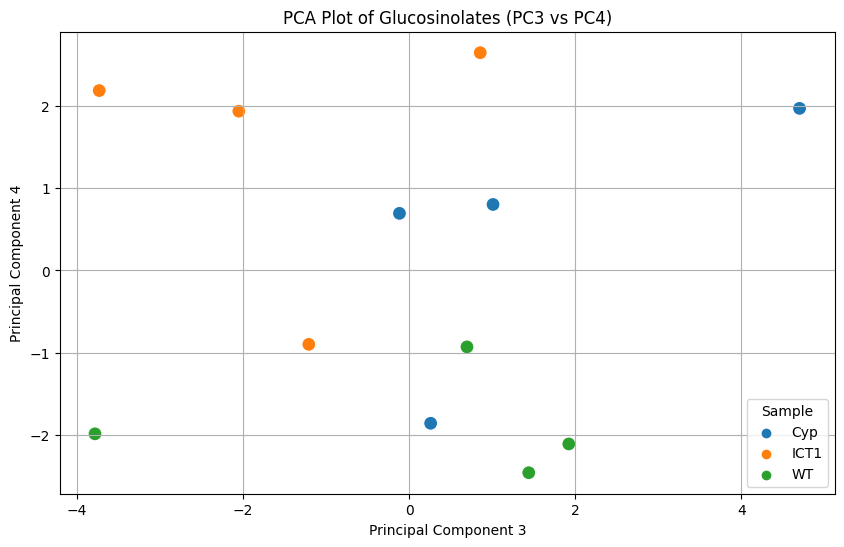

In [78]:
# Perform PCA with n_components=4
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results and add the sample names
pca_df = pd.DataFrame(data=pca_result, columns=['PC2', 'PC3', 'PC4'])
pca_df['sample'] = df.index

# Modify the sample names to group samples with names starting with "Cyp" as "Cyp"
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'Cyp' if x.startswith('Cyp') else x)
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'ICT1' if x.startswith('ICT1') else x)
pca_df['sample'] = pca_df['sample'].apply(lambda x: 'WT' if x.startswith('WT') else x)

# Plot the PCA results using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC3', y='PC4', hue='sample', s=100)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA Plot of Glucosinolates (PC3 vs PC4)')
plt.legend(title='Sample')
plt.grid(True)
plt.show()

#Secondary metabolites

In [116]:
sm=pd.read_csv('pathogenic_model.csv', index_col='name')
print(sm.shape)
sm

(17, 206)


,Ac-Val-OH,Glutathione reduced,N-ACETYLGLUTAMATE,N-Acetyl-L-tyrosine,N-ACETYLTRYPTOPHAN,Phenylalanine,PYROGLUTAMATE (oxoproline),Tryptophan,Tyrosine,1- // 2- Methylpropyl glucosinolate // Butyl glucosinolate - isomer 1,...,Sinensin,Symplocosin,Syringin,Syringyl(8-O-4)ferulic acid ether hexoside,Trisinapoyl dihexose,Obacunone 17-glucoside (NP-021153),4-PYRIDOXATE,Pantothenic acid (Vitamin B5),Riboflavin (Vitamin B2),Riboflavin 5'-phosphate
name,,,,,,,,,,,,,,,,,,,,,
class,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,amino acids and derivatives,Glucosinolate,...,phenylpropanoid,phenylpropanoid,phenylpropanoid,phenylpropanoid,phenylpropanoid,Triterpene,vitamins and derivatives,vitamins and derivatives,vitamins and derivatives,vitamins and derivatives
Cyp-1,479.2271434,7134.537116,2594.757252,462.926204,600.4745833,2554.667209,237.8523039,5377.570162,680.1621556,4356.962728,...,4112.367336,38647.7481,200158.864,10542.03659,434.3632002,1471.767211,739.9825533,4091.260276,876.5222302,11950.20289
Cyp-2,599.5090485,8379.206623,2046.203679,399.6629203,532.8727811,2368.02961,0,5538.216969,603.1859574,3648.960859,...,3906.477283,39460.0544,192384.6042,11105.93273,376.7751537,1478.306582,847.0467323,4134.861285,837.4355442,11231.26974
Cyp-3,548.8716769,6991.801476,2712.366904,461.7748956,575.7035612,2338.4225,0,4743.718664,572.3211731,4236.36734,...,2753.738852,35476.20568,179499.9241,9762.472345,347.5020022,1567.676835,713.7274921,3698.56256,767.65576,11188.71035
Cyp-4,522.2918247,6545.717674,2642.301102,526.5785517,561.0042551,2205.620523,233.6473578,4550.26028,619.7825056,4071.331755,...,3097.140424,34815.76969,240243.7022,11111.08912,395.0479757,2228.397022,926.9765833,4501.659833,782.3022764,11301.95426
ICT1-1,480.2223636,6695.974938,2676.291652,678.4947142,716.6165317,2384.995258,295.074197,3084.258256,564.689624,4571.307993,...,2774.667092,38372.81275,186671.6139,10700.65644,492.4488042,1135.045092,723.1335434,4113.79832,741.1789906,13431.6514
ICT1-2,463.8584379,5088.105217,1831.495016,683.2201343,615.8577319,2142.635167,260.9247879,2930.234654,471.1823124,4417.179205,...,2348.865051,36257.39304,182230.5433,10447.69708,356.0962822,989.7374921,657.4764951,4427.833634,0,11736.74054
ICT1-3,533.7041445,6756.766688,2668.365042,642.3878119,595.8029113,2489.876487,544.5835555,4480.305915,742.9874671,3912.476241,...,3589.418294,39524.73782,181547.4557,10175.25798,529.4856135,1103.417074,696.7399156,4611.37446,835.6122619,12546.91982
ICT1-4,408.8721225,5603.861261,2066.366591,674.3542655,549.1184921,2071.870356,244.1678706,2852.111427,530.5300172,3551.17821,...,2770.913696,34509.10293,161827.0792,10348.99606,398.7538693,693.5353877,757.9493792,4153.699428,0,11160.7111


In [117]:
sm.drop(['class','ICT1xCyp-1','ICT1xCyp-2','ICT1xCyp-3','ICT1xCyp-4'], inplace=True)
sm

,Ac-Val-OH,Glutathione reduced,N-ACETYLGLUTAMATE,N-Acetyl-L-tyrosine,N-ACETYLTRYPTOPHAN,Phenylalanine,PYROGLUTAMATE (oxoproline),Tryptophan,Tyrosine,1- // 2- Methylpropyl glucosinolate // Butyl glucosinolate - isomer 1,...,Sinensin,Symplocosin,Syringin,Syringyl(8-O-4)ferulic acid ether hexoside,Trisinapoyl dihexose,Obacunone 17-glucoside (NP-021153),4-PYRIDOXATE,Pantothenic acid (Vitamin B5),Riboflavin (Vitamin B2),Riboflavin 5'-phosphate
name,,,,,,,,,,,,,,,,,,,,,
Cyp-1,479.2271434,7134.537116,2594.757252,462.926204,600.4745833,2554.667209,237.8523039,5377.570162,680.1621556,4356.962728,...,4112.367336,38647.7481,200158.864,10542.03659,434.3632002,1471.767211,739.9825533,4091.260276,876.5222302,11950.20289
Cyp-2,599.5090485,8379.206623,2046.203679,399.6629203,532.8727811,2368.02961,0,5538.216969,603.1859574,3648.960859,...,3906.477283,39460.0544,192384.6042,11105.93273,376.7751537,1478.306582,847.0467323,4134.861285,837.4355442,11231.26974
Cyp-3,548.8716769,6991.801476,2712.366904,461.7748956,575.7035612,2338.4225,0,4743.718664,572.3211731,4236.36734,...,2753.738852,35476.20568,179499.9241,9762.472345,347.5020022,1567.676835,713.7274921,3698.56256,767.65576,11188.71035
Cyp-4,522.2918247,6545.717674,2642.301102,526.5785517,561.0042551,2205.620523,233.6473578,4550.26028,619.7825056,4071.331755,...,3097.140424,34815.76969,240243.7022,11111.08912,395.0479757,2228.397022,926.9765833,4501.659833,782.3022764,11301.95426
ICT1-1,480.2223636,6695.974938,2676.291652,678.4947142,716.6165317,2384.995258,295.074197,3084.258256,564.689624,4571.307993,...,2774.667092,38372.81275,186671.6139,10700.65644,492.4488042,1135.045092,723.1335434,4113.79832,741.1789906,13431.6514
ICT1-2,463.8584379,5088.105217,1831.495016,683.2201343,615.8577319,2142.635167,260.9247879,2930.234654,471.1823124,4417.179205,...,2348.865051,36257.39304,182230.5433,10447.69708,356.0962822,989.7374921,657.4764951,4427.833634,0,11736.74054
ICT1-3,533.7041445,6756.766688,2668.365042,642.3878119,595.8029113,2489.876487,544.5835555,4480.305915,742.9874671,3912.476241,...,3589.418294,39524.73782,181547.4557,10175.25798,529.4856135,1103.417074,696.7399156,4611.37446,835.6122619,12546.91982
ICT1-4,408.8721225,5603.861261,2066.366591,674.3542655,549.1184921,2071.870356,244.1678706,2852.111427,530.5300172,3551.17821,...,2770.913696,34509.10293,161827.0792,10348.99606,398.7538693,693.5353877,757.9493792,4153.699428,0,11160.7111
WT-1,593.4626227,6143.920516,3516.356277,555.1960304,659.0295938,2386.314415,247.6940205,3040.237743,497.6606898,5295.103498,...,2668.42391,40934.80822,255763.6818,13251.50424,280.6105725,2184.24085,824.8147415,4286.223297,1028.849419,13183.39043


In [118]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(sm)

In [119]:
pca = PCA(n_components=2)
pca_result1 = pca.fit_transform(scaled_data)

pca_result1

array([[ 11.51299381,  -3.79453168],
       [ 14.86756312,  -1.56826735],
       [  6.14510976,   7.42161751],
       [  8.24022415,   5.1941653 ],
       [ -6.85637774,  -2.25928374],
       [ -9.80907912,   5.43379411],
       [ -1.01353173,  -3.25670677],
       [ -5.80635576,  10.46864437],
       [ -4.04775681, -10.0188524 ],
       [ -5.88872316, -10.10555894],
       [ -0.65703595,  -1.5848568 ],
       [ -6.68703056,   4.06983639]])

In [120]:
pca_df1 = pd.DataFrame(data=pca_result1, columns=['PC1', 'PC2'])
pca_df1['sample'] = sm.index

pca_df1

,PC1,PC2,sample
0,11.512994,-3.794532,Cyp-1
1,14.867563,-1.568267,Cyp-2
2,6.145110,7.421618,Cyp-3
3,8.240224,5.194165,Cyp-4
4,-6.856378,-2.259284,ICT1-1
5,-9.809079,5.433794,ICT1-2
6,-1.013532,-3.256707,ICT1-3
7,-5.806356,10.468644,ICT1-4
8,-4.047757,-10.018852,WT-1
9,-5.888723,-10.105559,WT-2


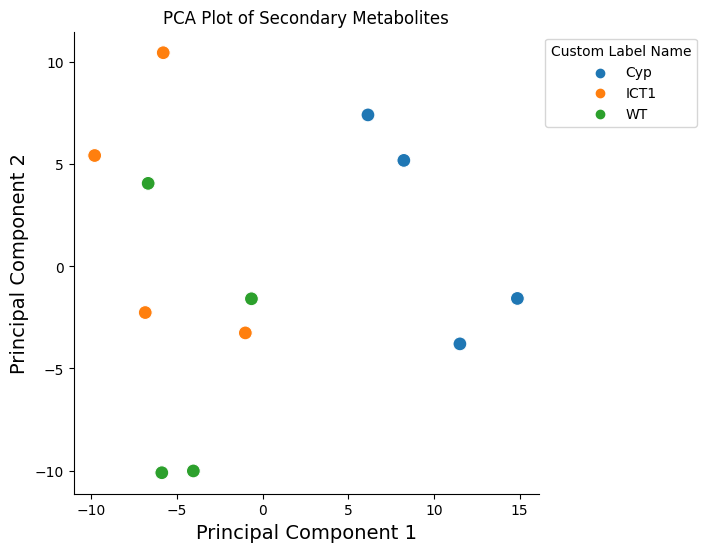

In [121]:

# Modify the sample names to group all Cyp samples
pca_df1['sample'] = pca_df1['sample'].apply(lambda x: 'Cyp' if x.startswith('Cyp') else x)
pca_df1['sample'] = pca_df1['sample'].apply(lambda x: 'ICT1' if x.startswith('ICT1') else x)
pca_df1['sample'] = pca_df1['sample'].apply(lambda x: 'WT' if x.startswith('WT') else x)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=pca_df1, x='PC1', y='PC2', hue='sample', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA Plot of Secondary Metabolites')
plt.legend(title='Sample')
plt.grid(True)

# Create a legend with custom label names and move it to the right side
plt.legend(title='Custom Label Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
sns.despine()
plt.show()

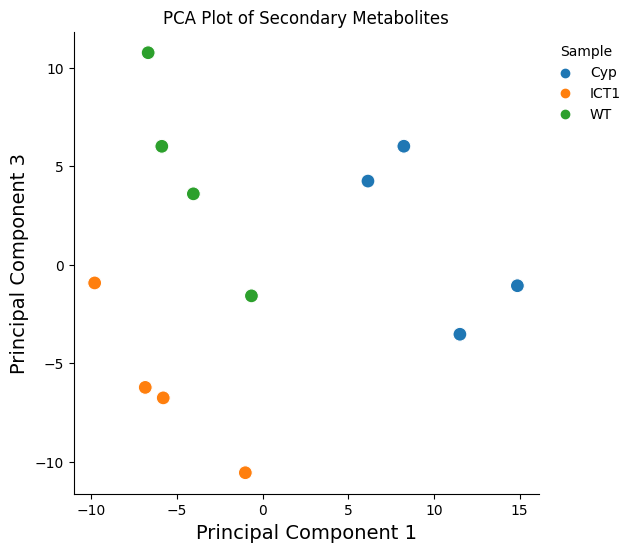

In [128]:
pca = PCA(n_components=3)
pca_result2 = pca.fit_transform(scaled_data)

pca_df2 = pd.DataFrame(data=pca_result2, columns=['PC1', 'PC2','PC3'])
pca_df2['sample'] = sm.index

# Modify the sample names to group all Cyp samples
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'Cyp' if x.startswith('Cyp') else x)
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'ICT1' if x.startswith('ICT1') else x)
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'WT' if x.startswith('WT') else x)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=pca_df2, x='PC1', y='PC3', hue='sample', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 3', fontsize=14)
plt.title('PCA Plot of Secondary Metabolites')
plt.legend(title='Sample', frameon=False)
plt.grid(True)

# Create a legend with custom label names and move it to the right side
plt.legend(title='Sample', bbox_to_anchor=(1, 1), loc='upper left',frameon=False)
plt.grid(False)
sns.despine()
plt.show()



In [124]:
# Perform PCA with n_components=3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results and add the sample names
pca_df2 = pd.DataFrame(data=pca_result1, columns=['PC1', 'PC2', 'PC3'])
pca_df2['sample'] = sm.index

# Modify the sample names to group samples with names starting with "Cyp" as "Cyp"
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'Cyp' if x.startswith('Cyp') else x)
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'ICT1' if x.startswith('ICT1') else x)
pca_df2['sample'] = pca_df2['sample'].apply(lambda x: 'WT' if x.startswith('WT') else x)

# Plot the PCA results using Seaborn
plt.figure(figsize=(6, 6))
sns.scatterplot(data=pca_df1, x='PC1', y='PC3', hue='sample', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 3', fontsize=14)
plt.title('PCA Plot of Secondary Metabolites (PC1 vs PC3)')
plt.legend(title='Sample')
plt.grid(True)

# Remove the top and right spines (frame) of the plot
plt.legend(title='Custom Label Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
sns.despine()

plt.show()

ValueError: ignored